In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Google = data.DataReader("GOOG", data_source="yahoo", start = "2004-08-01", end = "2019-06-01")
Google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527
2004-08-24,55.439419,51.450363,55.260582,52.096165,15361800.0,52.096165
2004-08-25,53.651051,51.604362,52.140873,52.657513,9257400.0,52.657513


In [3]:
Google.shape

(3716, 6)

In [4]:
Google_train = Google.iloc[:3500, :]
Google_train.shape

(3500, 6)

In [5]:
Google_test = Google.iloc[3500:, :]
Google_test.shape

(216, 6)

In [6]:
training_set = Google.iloc[:3500, 2:3].values
training_set

array([[  49.67689896],
       [  50.17863464],
       [  55.01716614],
       ...,
       [1144.58996582],
       [1159.89001465],
       [1185.        ]])

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 3499):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
3439/3439 [==============================] - 129s 38ms/step - loss: 0.0095
Epoch 2/100
3439/3439 [==============================] - 116s 34ms/step - loss: 0.0024
Epoch 3/100
3439/3439 [==============================] - 114s 33ms/step - loss: 0.0019
Epoch 4/100
3439/3439 [==============================] - 115s 33ms/step - loss: 0.0017
Epoch 5/100
3439/3439 [==============================] - 110s 32ms/step - loss: 0.0016
Epoch 6/100
3439/3439 [==============================] - 116s 34ms/step - loss: 0.0016
Epoch 7/100
3439/3439 [==============================] - 111s 32ms/step - loss: 0.0014
Epoch 8/100
3439/3439 [==============================] - 114s 33ms/step - loss: 0.0014
Epoch 9/100
3439/3439 [==============================] - 115s 34ms/st

3439/3439 [==============================] - 109s 32ms/step - loss: 6.1856e-04
Epoch 82/100
3439/3439 [==============================] - 114s 33ms/step - loss: 5.7911e-04
Epoch 83/100
3439/3439 [==============================] - 112s 33ms/step - loss: 5.3889e-04
Epoch 84/100
3439/3439 [==============================] - 113s 33ms/step - loss: 5.6696e-04
Epoch 85/100
3439/3439 [==============================] - 112s 33ms/step - loss: 5.2892e-04
Epoch 86/100
3439/3439 [==============================] - 112s 33ms/step - loss: 5.5678e-04
Epoch 87/100
3439/3439 [==============================] - 114s 33ms/step - loss: 5.9895e-04
Epoch 88/100
3439/3439 [==============================] - 113s 33ms/step - loss: 5.8171e-04
Epoch 89/100
3439/3439 [==============================] - 112s 33ms/step - loss: 5.8444e-04
Epoch 90/100
3439/3439 [==============================] - 122s 35ms/step - loss: 5.3037e-04
Epoch 91/100
3439/3439 [==============================] - 121s 35ms/step - loss: 5.0372e-04
E

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2019
real_stock_price = Google_test.iloc[:, 2:3].values

In [11]:
# Getting the predicted stock price of 2019
Google_total = pd.concat((Google_train['Close'], Google_test['Close']), axis = 0)
inputs = Google_total[len(Google_total) - len(Google_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 276):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

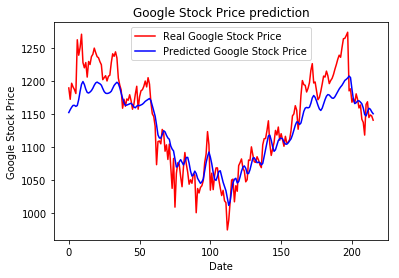

In [13]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price prediction')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [14]:
#Evaluating the RNN
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

29.415886871946537

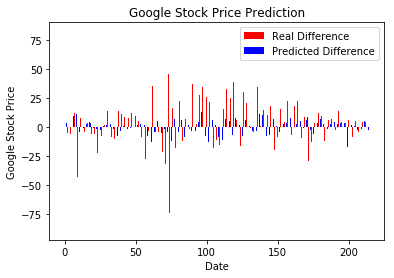

In [15]:
# Visualising the results
 
shift_pred= predicted_stock_price[:-1]
shift_pred = np.append(0, np.reshape(shift_pred, len(shift_pred)))
shift_real = real_stock_price[:-1]
shift_real = np.append(0, np.reshape(shift_real, len(shift_real)))
 
dif_pred = np.add(np.reshape(predicted_stock_price, len(predicted_stock_price)), - shift_pred)[1:]
dif_real = np.add(np.reshape(real_stock_price, len(real_stock_price)), - shift_real)[1:]
 
fig, ax = plt.subplots()
ind = np.arange(dif_real.size)
real_bar = ax.bar(ind-0.15, dif_real, width=0.3, color = 'red', label = 'Real Difference')
pred_bar = ax.bar(ind+0.15, dif_pred, width=0.3, color = 'blue', label = 'Predicted Difference')
ax.set_title('Google Stock Price Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Google Stock Price')
ax.legend()
plt.show()